# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [18]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&'
#Create Lists to store values
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
#Set count for list
count = 1
#Loop through cities and create query url to extract API data
for city in cities:
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
#Print log of cities. Use try in case city is not found
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Random City Number {count} : {city}")
        count += 1
    except (KeyError):
        print('City not found...')


Random City Number 1 : kaitangata
Random City Number 2 : shumskiy
Random City Number 3 : airai
Random City Number 4 : cape town
Random City Number 5 : kapaa
Random City Number 6 : saldanha
Random City Number 7 : ostrovnoy
Random City Number 8 : vao
Random City Number 9 : mossendjo
Random City Number 10 : kahului
Random City Number 11 : lebu
Random City Number 12 : bluff
Random City Number 13 : gravelbourg
Random City Number 14 : viedma
Random City Number 15 : jamestown
Random City Number 16 : vysokogornyy
Random City Number 17 : klaksvik
City not found...
Random City Number 18 : pisco
Random City Number 19 : burgeo
Random City Number 20 : saint-philippe
Random City Number 21 : busselton
Random City Number 22 : ewa beach
Random City Number 23 : atuona
Random City Number 24 : baykit
Random City Number 25 : hobart
Random City Number 26 : punta arenas
Random City Number 27 : fairbanks
Random City Number 28 : rikitea
Random City Number 29 : itarema
Random City Number 30 : antalaha
Random Ci

City not found...
Random City Number 234 : isla mujeres
City not found...
Random City Number 235 : motala
Random City Number 236 : new norfolk
Random City Number 237 : mae sot
Random City Number 238 : dothan
Random City Number 239 : neiafu
Random City Number 240 : parrita
Random City Number 241 : tocopilla
Random City Number 242 : mecca
Random City Number 243 : baruun-urt
Random City Number 244 : pontian kecil
Random City Number 245 : lake havasu city
Random City Number 246 : tautira
Random City Number 247 : belyy yar
Random City Number 248 : gilbues
Random City Number 249 : conde
Random City Number 250 : borogontsy
Random City Number 251 : mallow
Random City Number 252 : victoria
Random City Number 253 : taloqan
Random City Number 254 : te anau
Random City Number 255 : tasiilaq
City not found...
Random City Number 256 : guerrero negro
Random City Number 257 : south venice
Random City Number 258 : hasaki
Random City Number 259 : igarka
City not found...
Random City Number 260 : christc

Random City Number 461 : collie
Random City Number 462 : fort nelson
Random City Number 463 : puro
Random City Number 464 : dhidhdhoo
Random City Number 465 : iranshahr
Random City Number 466 : khasan
Random City Number 467 : dombarovskiy
Random City Number 468 : aykhal
Random City Number 469 : jamame
Random City Number 470 : qinzhou
Random City Number 471 : cine
Random City Number 472 : devgarh
Random City Number 473 : botelhos
Random City Number 474 : ossora
Random City Number 475 : novikovo
Random City Number 476 : garden city
Random City Number 477 : vallenar
Random City Number 478 : preeceville
Random City Number 479 : pahrump
City not found...
Random City Number 480 : gboko
Random City Number 481 : menomonie
Random City Number 482 : neyshabur
Random City Number 483 : estepa
Random City Number 484 : anshun
Random City Number 485 : seydisehir
Random City Number 486 : palizada
Random City Number 487 : dire dawa
Random City Number 488 : sutton
Random City Number 489 : dondo
Random Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#Create dataframe for city
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df.to_csv("../output_data/city.csv")
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kaitangata,9,NZ,1619245895,74,-46.2817,169.8464,50.00,1.99
1,Shumskiy,100,RU,1619245896,87,54.8318,99.1328,35.38,4.68
2,Airai,86,TL,1619245896,74,-8.9266,125.4092,67.59,2.91
3,Cape Town,0,ZA,1619245896,82,-33.9258,18.4232,63.00,9.22
4,Kapaa,90,US,1619245897,73,22.0752,-159.3190,75.20,16.11
...,...,...,...,...,...,...,...,...,...
561,Gambēla,41,ET,1619246104,42,8.2500,34.5833,89.73,5.32
562,Lanzhou,90,CN,1619246104,66,36.0564,103.7922,48.20,4.47
563,Mocajuba,99,BR,1619246105,99,-2.5842,-49.5072,72.84,2.19
564,Pueblo Nuevo,100,MX,1619246105,85,17.1000,-92.8833,60.94,4.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#Create dataframe that shows values where humidity is lower than 100
clean_city_data = city_df[city_df['Humidity'] < 100] 
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kaitangata,9,NZ,1619245895,74,-46.2817,169.8464,50.00,1.99
1,Shumskiy,100,RU,1619245896,87,54.8318,99.1328,35.38,4.68
2,Airai,86,TL,1619245896,74,-8.9266,125.4092,67.59,2.91
3,Cape Town,0,ZA,1619245896,82,-33.9258,18.4232,63.00,9.22
4,Kapaa,90,US,1619245897,73,22.0752,-159.3190,75.20,16.11
...,...,...,...,...,...,...,...,...,...
561,Gambēla,41,ET,1619246104,42,8.2500,34.5833,89.73,5.32
562,Lanzhou,90,CN,1619246104,66,36.0564,103.7922,48.20,4.47
563,Mocajuba,99,BR,1619246105,99,-2.5842,-49.5072,72.84,2.19
564,Pueblo Nuevo,100,MX,1619246105,85,17.1000,-92.8833,60.94,4.29


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

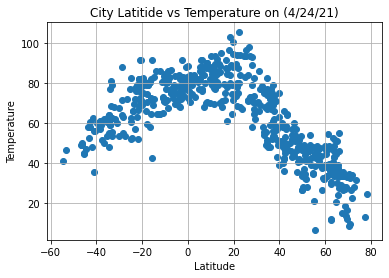

In [40]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title("City Latitide vs Temperature on (4/24/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()
plt.savefig("../output_data/City Latitude vs Temperature.png")

## Latitude vs. Humidity Plot

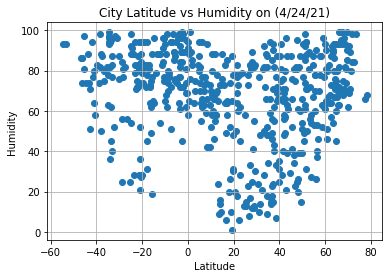

In [41]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title("City Latitude vs Humidity on (4/24/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

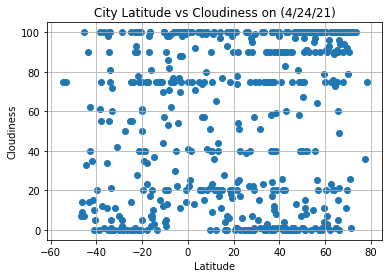

In [42]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title("City Latitude vs Cloudiness on (4/24/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

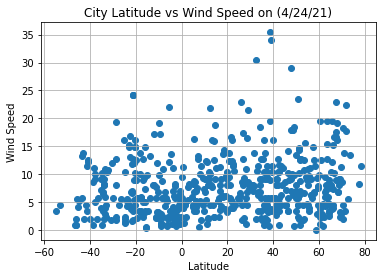

In [43]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title("City Latitude vs Wind Speed on (4/24/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [67]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
#Define function for linear regression plot
def linear_reg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize = 13,color="red")
    plt.xlabel("Latitude")
    rvalue = round(rvalue,2)
    print(f"r-squared = {rvalue}")
   

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = -0.88
None


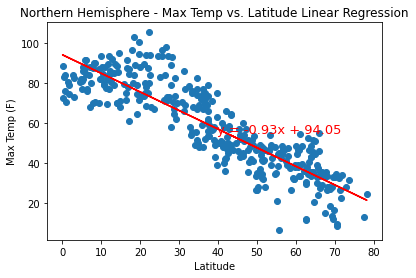

In [68]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = 0.71
None


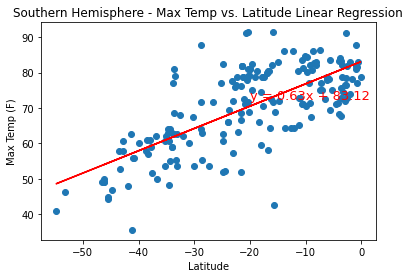

In [69]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = 0.21
None


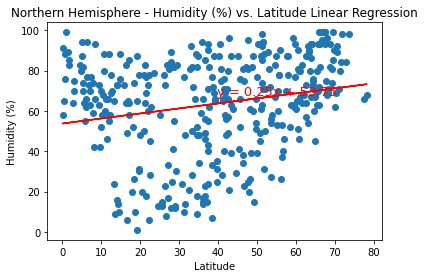

In [70]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = 0.05
None


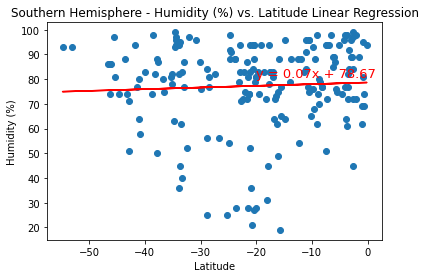

In [71]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = 0.18
None


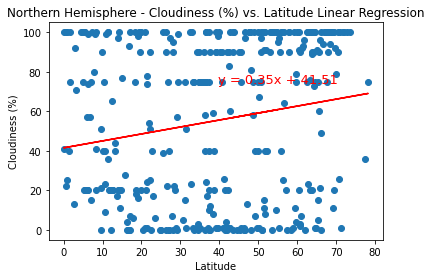

In [72]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = 0.34
None


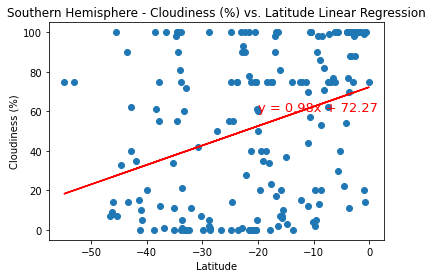

In [73]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = 0.08
None


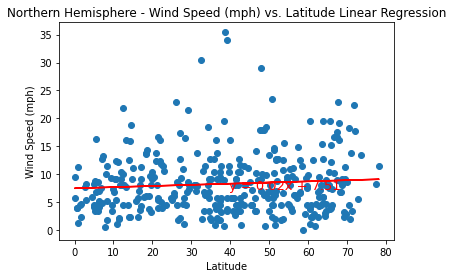

In [76]:
x = northern_hemisphere["Lat"]
y = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.07
None


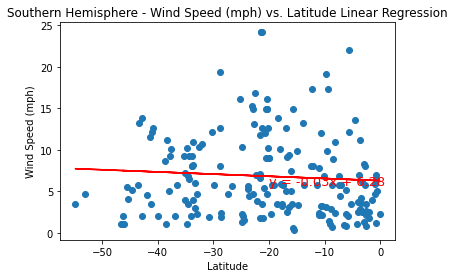

In [77]:
x = southern_hemisphere["Lat"]
y = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(linear_reg_plot(x,y))